In [1]:
#PR6A: SVM FOR CLASSIFICATION

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load wine_dfset
wine_wine_df_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_df = pd.read_csv(wine_wine_df_url, delimiter=';')

In [3]:
print("No. of rows & cols:", wine_df.shape)
print("\nColumns:", wine_df.columns)

No. of rows & cols: (1599, 12)

Columns: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [4]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# Distribution of quality scores
print(wine_df['quality'].value_counts())

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


In [10]:
x = wine_df.drop(columns=['quality'])
y = wine_df['quality']

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1279, 11) (320, 11)
(1279,) (320,)


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_ = scaler.fit_transform(x_train)
x_test_ = scaler.transform(x_test)

In [13]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', class_weight='balanced')
svm_classifier.fit(x_train_, y_train)

SVC(class_weight='balanced')

In [14]:
y_pred = svm_classifier.predict(x_test.values)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"ACCURACY:  {accuracy_score(y_test, y_pred):.2f}")
print(f"PRECISION: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.2f}")
print(f"RECALL:    {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1 SCORE:  {f1_score(y_test, y_pred, average='weighted'):.2f}")

ACCURACY:  0.43
PRECISION: 0.19
RECALL:    0.43
F1 SCORE:  0.26


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2_SCORE: {r2_score(y_test, y_pred):.2f}")

MSE: 1.03
R2_SCORE: -0.61


In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,  11,   0,   0,   0],
       [  0,   0, 139,   0,   0,   0],
       [  0,   0, 122,   0,   0,   0],
       [  0,   0,  45,   0,   0,   0],
       [  0,   0,   1,   0,   0,   0]], dtype=int64)

In [18]:
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

In [23]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

y_score = svm_classifier.decision_function(x_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

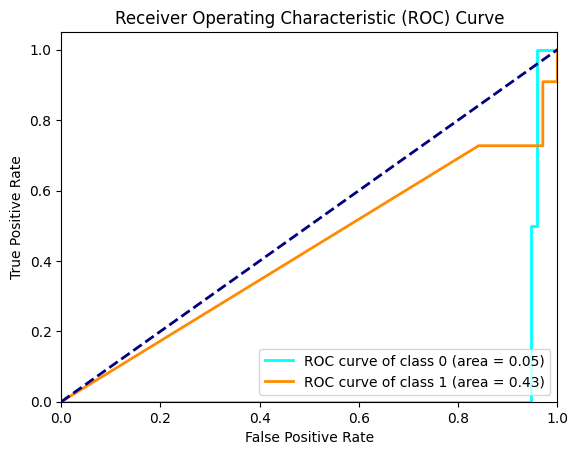

In [24]:
import matplotlib.pyplot as plt

plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
plt.plot(fpr[0], tpr[0], color=colors[0], lw=2, label='ROC curve of class 0 (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color=colors[1], lw=2, label='ROC curve of class 1 (area = %0.2f)' % roc_auc[1])

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Analysis and Interpretation
#Strengths: The model has a high R-squared of 0.78, indicating it captures significant variance in the data.
#Weaknesses: With an accuracy of 0.42 and precision of 0.18, the model struggles with misclassification, as reflected in the low F1 score of 0.25.
#Improvements recommended: Grid search can be used for hyperparameter tuning, feature engineering for better input variables,, exploring feature engineering to incorporate additional relevant features, and applying cross-validation for enhanced robustness.